In [8]:
# Importando as bibliotecas utilizadas

import os
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

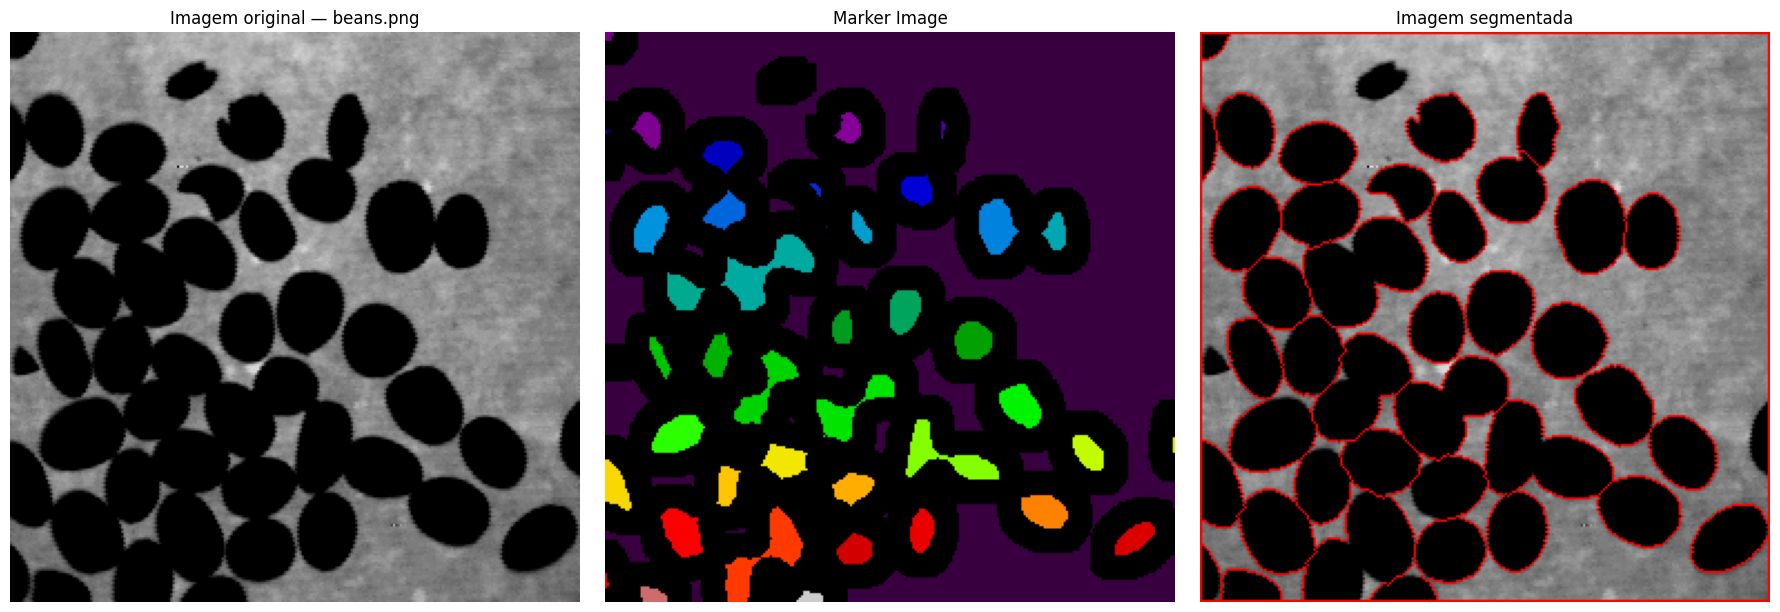

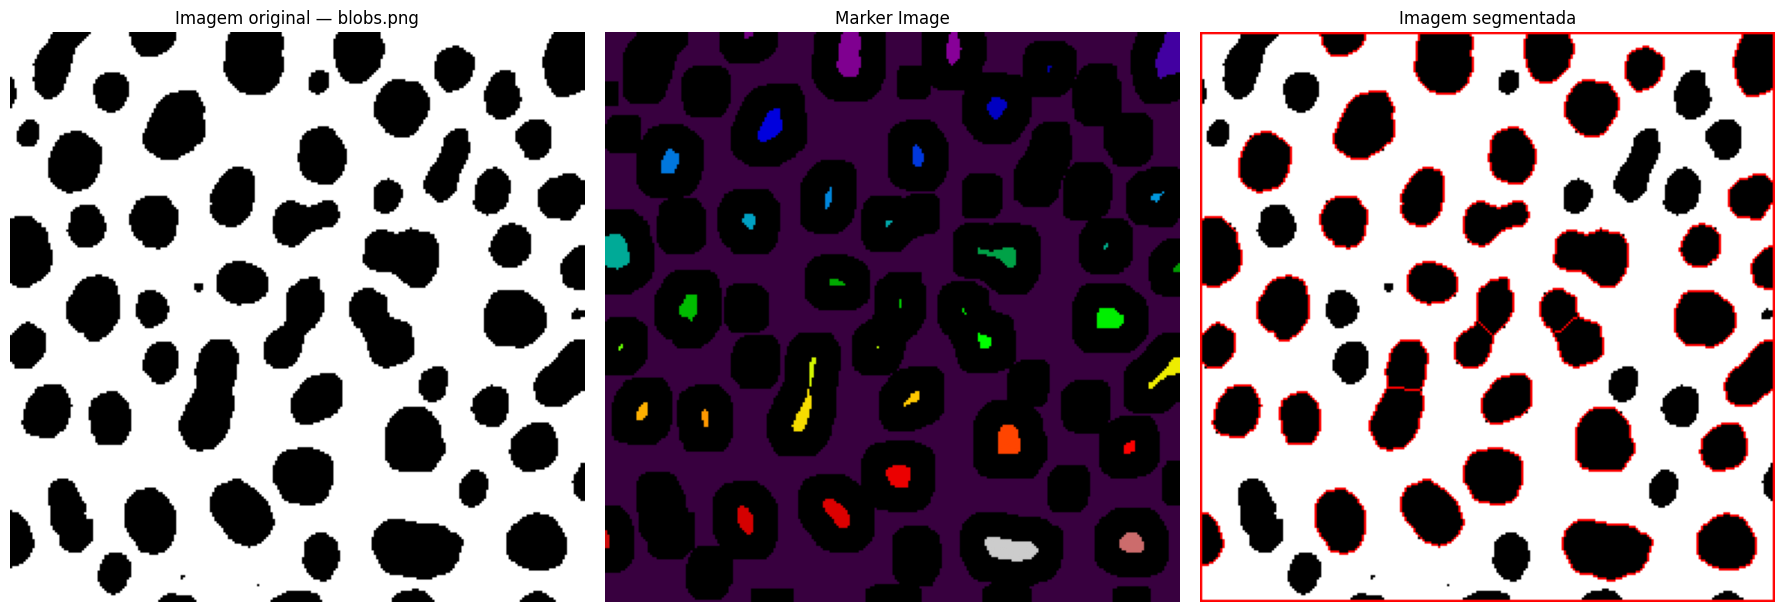

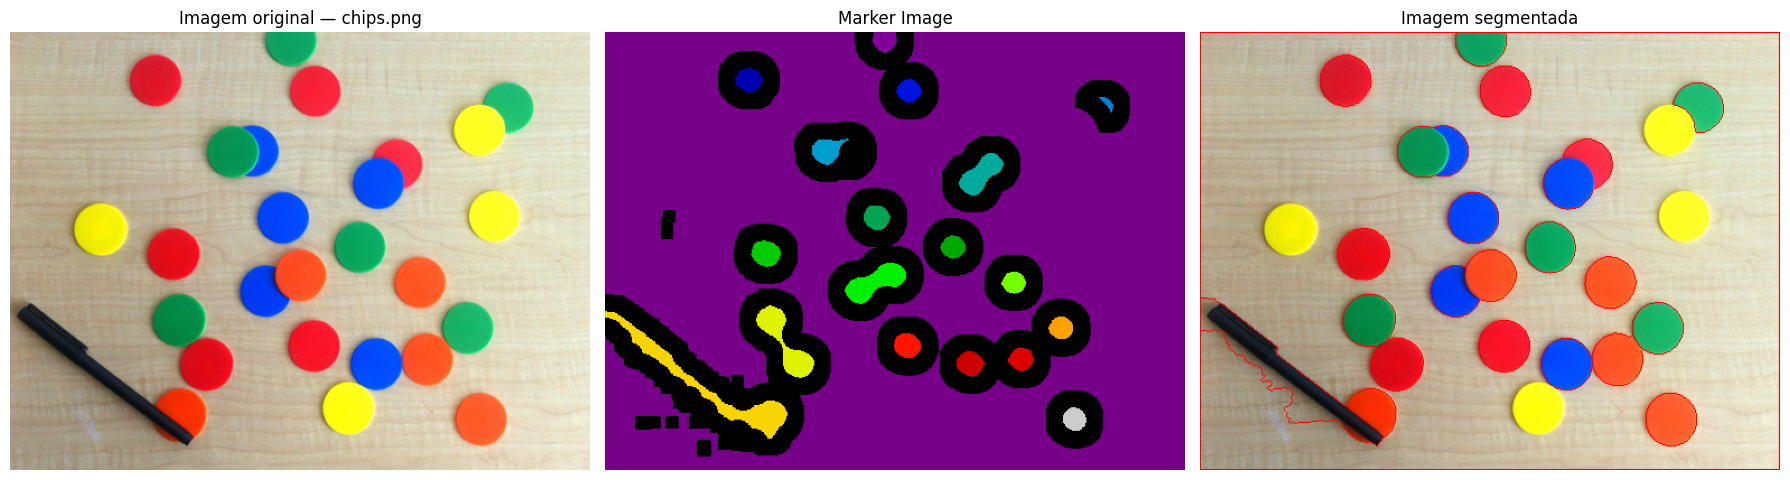

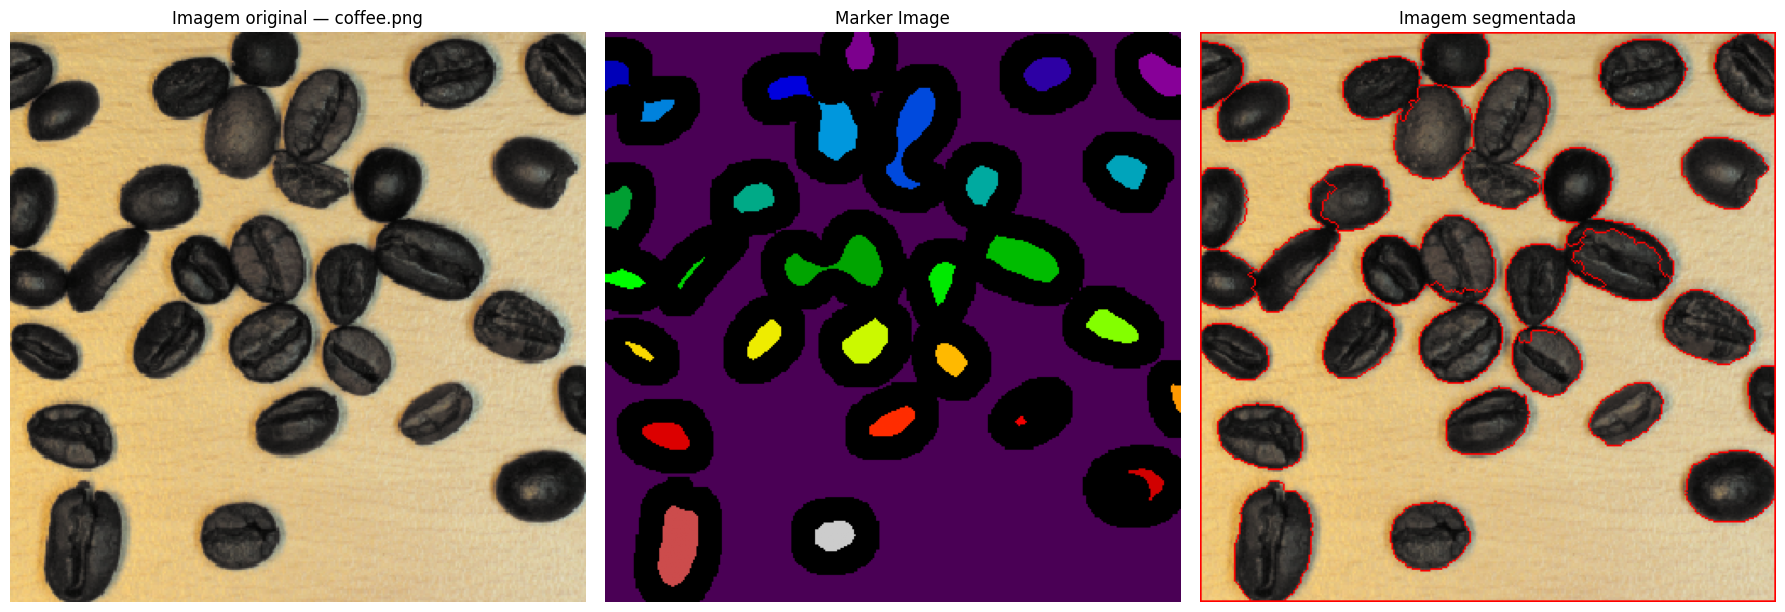

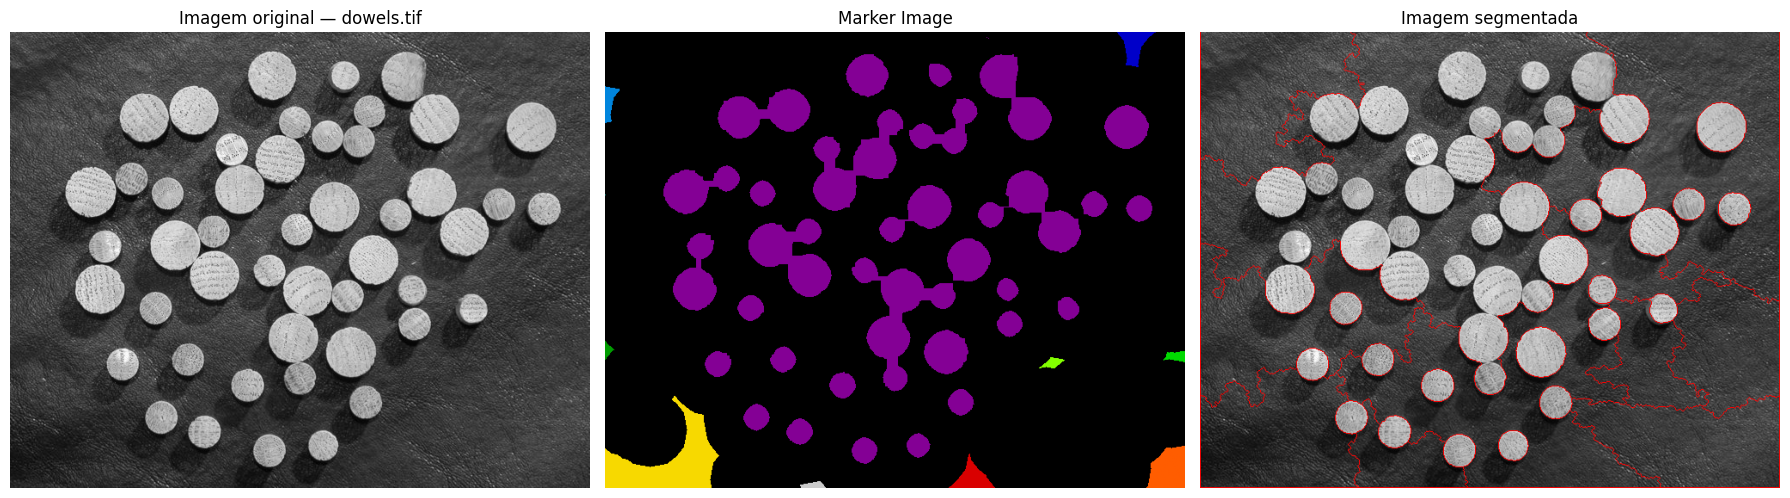

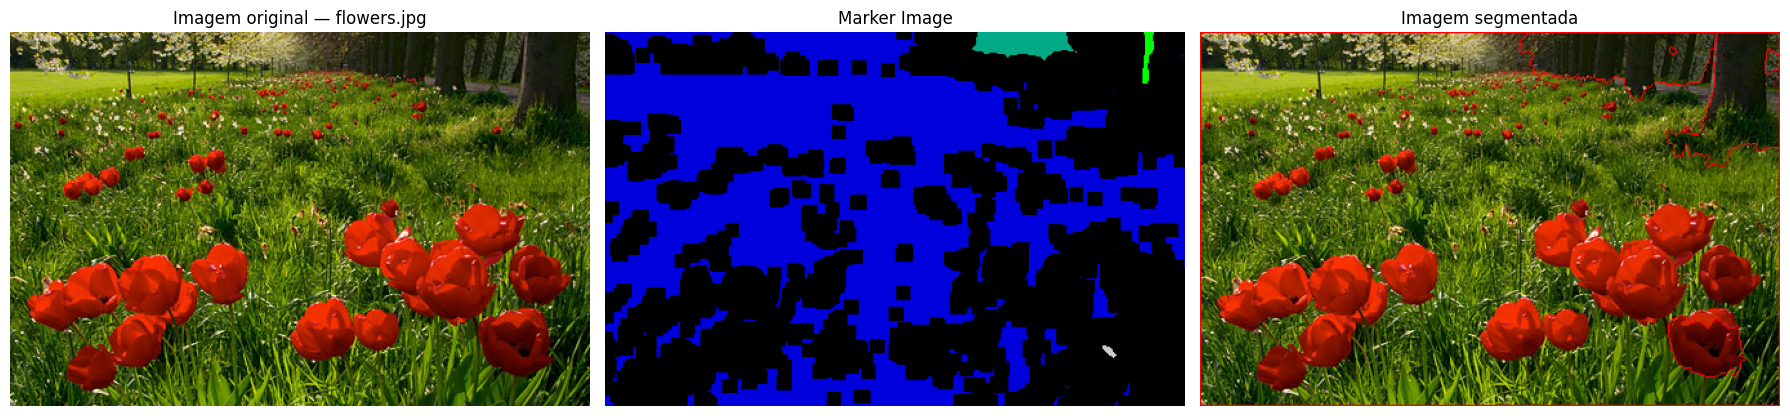

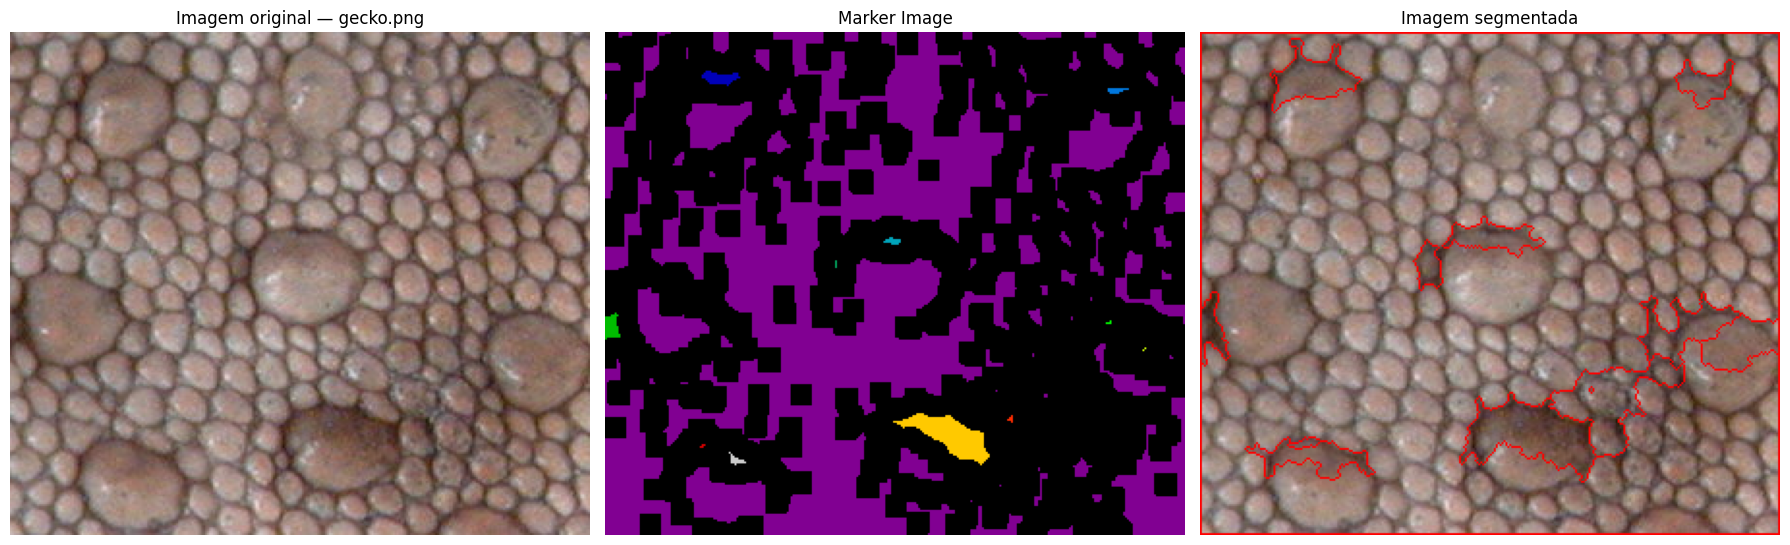

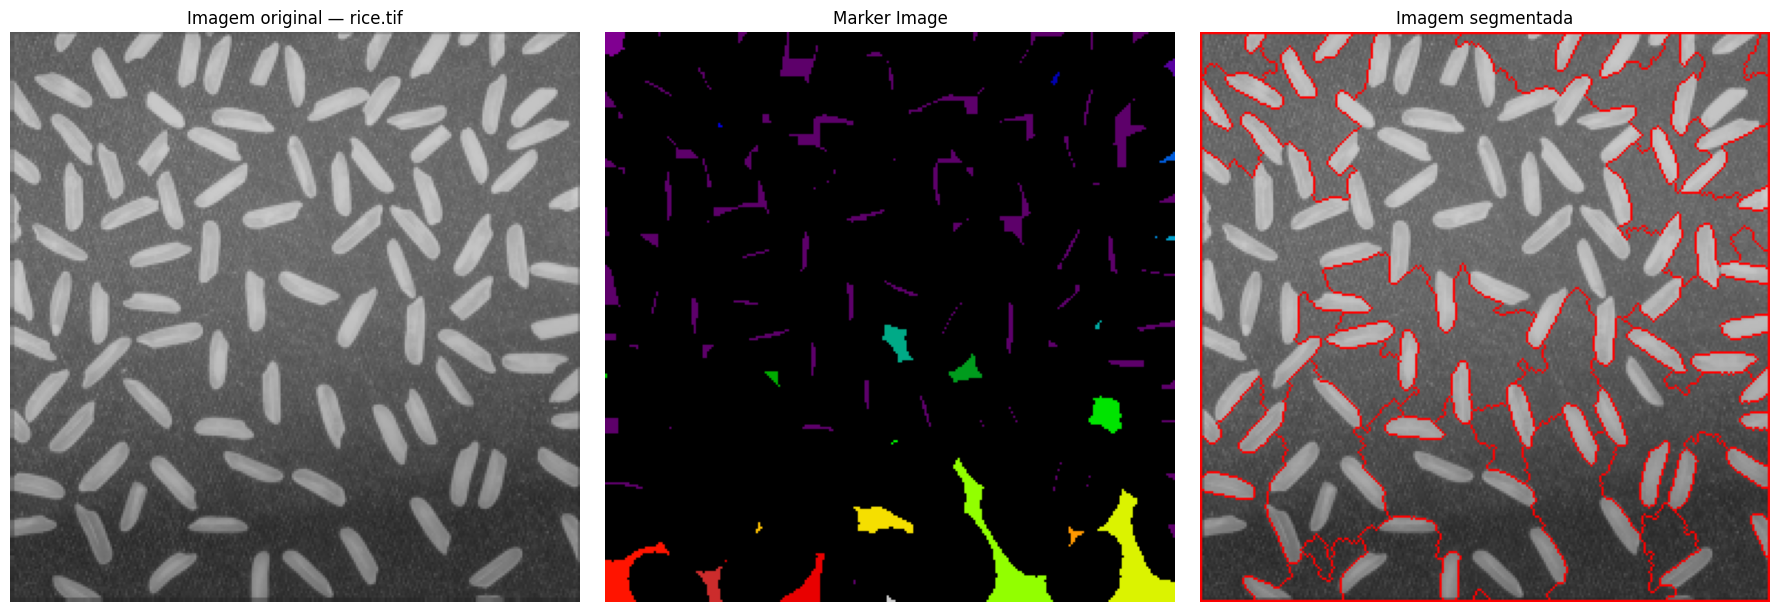

In [9]:
# Segmentação de imagens usando o algoritmo Watershed

# Preparação das imagens para o algoritmo

# Imagens usadas no exercício
images = ['beans.png', 'blobs.png', 'chips.png', 'coffee.png', 'dowels.tif', 'flowers.jpg',
          'gecko.png', 'rice.tif']

for path in images:
    # Verificando se o caminho das imagens está correto
    if not os.path.exists(path):
        print(f'O arquivo não foi encontrado — {path}')
        continue

    # Carregando e convertendo as imagens para uma escala de cinza
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Processo de thresholding
    ret, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remoção de ruído
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

    # Operações morfológicas

    # Área de fundo definida
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Distância de cada pixel branco na imagem binária até o pixel preto mais próximo
    dist = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

    # Área do primeiro plano
    ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)

    # Área desconhecida
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Criando a imagem de marcador (Marker image)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    markers_before_ws = markers.copy()

# Algoritmo Watershed

    markers_ws = cv2.watershed(img, markers)

    img_out = img.copy()
    img_out[markers_ws == -1] = [0, 0, 255]

    # Plotando a imagem original, marker image e  a imagem segmentada
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f'Imagem original — {path}')
    ax[0].axis('off')

    ax[1].imshow(markers_before_ws, cmap='nipy_spectral')
    ax[1].set_title('Marker Image')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Imagem segmentada')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()
